In [1]:
# Standard Packages
import pandas as pd
import numpy as np

# Viz Packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Scipy Stats
import scipy.stats as stats 

# Statsmodel Api
import statsmodels.api as sm
from statsmodels.formula.api import ols

# SKLearn Modules
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Opening up our Kings County Housing Prices dataset
df = pd.read_csv('/Users/aheinke/Documents/Flatiron/NYC-DS-010923/Phase_2/Phase2_Final_Proj/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


In [3]:
# Taking a look at 
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [5]:
df['address']

0        2102 Southeast 21st Court, Renton, Washington ...
1        11231 Greenwood Avenue North, Seattle, Washing...
2        8504 South 113th Street, Seattle, Washington 9...
3        4079 Letitia Avenue South, Seattle, Washington...
4        2193 Northwest Talus Drive, Issaquah, Washingt...
                               ...                        
30150    4673 Eastern Avenue North, Seattle, Washington...
30151    4131 44th Avenue Southwest, Seattle, Washingto...
30152    910 Martin Luther King Jr Way, Seattle, Washin...
30153    17127 114th Avenue Southeast, Renton, Washingt...
30154    18615 7th Avenue South, Burien, Washington 981...
Name: address, Length: 30155, dtype: object

In [6]:
df['address'][0]

'2102 Southeast 21st Court, Renton, Washington 98055, United States'

In [7]:
df['nuisance']

0         NO
1        YES
2         NO
3         NO
4        YES
        ... 
30150     NO
30151     NO
30152    YES
30153     NO
30154     NO
Name: nuisance, Length: 30155, dtype: object

In [8]:
df['grade']

0        7 Average
1        7 Average
2        7 Average
3         9 Better
4        7 Average
           ...    
30150       8 Good
30151    7 Average
30152    7 Average
30153       8 Good
30154    7 Average
Name: grade, Length: 30155, dtype: object

In [9]:
df['grade'].value_counts()

7 Average        11697
8 Good            9410
9 Better          3806
6 Low Average     2858
10 Very Good      1371
11 Excellent       406
5 Fair             393
12 Luxury          122
4 Low               51
13 Mansion          24
3 Poor              13
2 Substandard        2
1 Cabin              2
Name: grade, dtype: int64

In [10]:
df['price'].value_counts()

650000.0     346
750000.0     307
800000.0     299
850000.0     296
600000.0     295
            ... 
838355.0       1
903888.0       1
576200.0       1
1081500.0      1
720902.0       1
Name: price, Length: 5202, dtype: int64

In [11]:
schools_df = pd.read_csv('/Users/aheinke/Documents/Flatiron/NYC-DS-010923/Phase_2/Phase2_Final_Proj/Report_Card_Assessment_Data_2021-22_School_year.csv')
schools_df

,SchoolYear,OrganizationLevel,County,ESDName,ESDOrganizationId,DistrictCode,DistrictName,DistrictOrganizationId,SchoolCode,SchoolName,...,Count of students expected to test including previously passed,CountMetStandard,PercentMetStandard,PercentLevel1,PercentLevel2,PercentLevel3,PercentLevel4,PercentMetTestedOnly,PercentNoScore,DataAsOf
0,2021-22,District,Grays Harbor,Capital Region ESD 113,100004.0,14005.0,Aberdeen School District,100010.0,NaN,District Total,...,176.0,54.0,30.7%,0.460227,0.221591,0.198864,0.107955,0.310345,0.011364,9/7/2022
1,2021-22,District,Grays Harbor,Capital Region ESD 113,100004.0,14005.0,Aberdeen School District,100010.0,NaN,District Total,...,107.0,35.0,32.7%,0.420561,0.224299,0.196262,0.130841,0.336538,0.028037,9/7/2022
2,2021-22,District,Grays Harbor,Capital Region ESD 113,100004.0,14005.0,Aberdeen School District,100010.0,NaN,District Total,...,111.0,39.0,35.1%,0.441441,0.198198,0.198198,0.153153,0.354545,0.009009,9/7/2022
3,2021-22,District,Grays Harbor,Capital Region ESD 113,100004.0,14005.0,Aberdeen School District,100010.0,NaN,District Total,...,NaN,NaN,Suppressed: N<10,NaN,NaN,NaN,NaN,NaN,NaN,9/7/2022
4,2021-22,District,Grays Harbor,Capital Region ESD 113,100004.0,14005.0,Aberdeen School District,100010.0,NaN,District Total,...,NaN,NaN,Suppressed: N<10,NaN,NaN,NaN,NaN,NaN,NaN,9/7/2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760171,2021-22,State,Multiple,State Total,NaN,NaN,State Total,NaN,NaN,State Total,...,25809.0,8952.0,34.7%,0.343795,0.234414,0.227944,0.118912,0.374953,0.074935,9/7/2022
760172,2021-22,State,Multiple,State Total,NaN,NaN,State Total,NaN,NaN,State Total,...,280558.0,161649.0,57.6%,0.173644,0.196114,0.305588,0.270571,0.609101,0.054083,9/7/2022
760173,2021-22,State,Multiple,State Total,NaN,NaN,State Total,NaN,NaN,State Total,...,289153.0,114128.0,39.5%,0.318903,0.228908,0.190969,0.203724,0.418771,0.057496,9/7/2022
760174,2021-22,State,Multiple,State Total,NaN,NaN,State Total,NaN,NaN,State Total,...,537988.0,203577.0,37.8%,0.328708,0.236754,0.189959,0.188442,0.400907,0.056137,9/7/2022


In [12]:
schools_df.describe()

,ESDOrganizationId,DistrictCode,DistrictOrganizationId,SchoolCode,SchoolOrganizationId,Count of Students Expected to Test,Count of students expected to test including previously passed,CountMetStandard,PercentLevel1,PercentLevel2,PercentLevel3,PercentLevel4,PercentMetTestedOnly,PercentNoScore
count,754163.000000,749376.000000,749376.000000,587239.000000,587239.000000,255154.000000,255154.000000,255154.000000,385285.000000,385285.000000,385285.000000,385285.000000,385285.000000,385285.000000
mean,100055.384047,22339.034248,100219.933789,3599.351349,102542.400409,399.483426,399.511232,178.480706,0.281602,0.231202,0.247096,0.181734,0.456136,0.058366
std,537.279292,10374.784782,603.587476,1097.526505,1672.995700,5756.888239,5757.043371,2680.040846,0.167085,0.092492,0.109450,0.146054,0.201013,0.110698
min,100001.000000,1109.000000,100001.000000,1502.000000,100326.000000,10.000000,10.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.011278,0.000000
25%,100003.000000,17001.000000,100084.000000,2756.000000,101338.000000,29.000000,29.000000,10.000000,0.151786,0.173913,0.166667,0.073171,0.300000,0.000000
50%,100006.000000,21401.000000,100159.000000,3471.000000,102241.000000,60.000000,60.000000,24.000000,0.262517,0.230769,0.239130,0.146853,0.444444,0.022504
75%,100007.000000,31201.000000,100231.000000,4392.000000,103074.000000,146.000000,146.000000,62.000000,0.393939,0.283391,0.316176,0.254658,0.600000,0.060293
max,105886.000000,39801.000000,106675.000000,5953.000000,106790.000000,564796.000000,564799.000000,285824.000000,0.938931,0.875000,0.866667,0.902655,1.000000,0.968481


In [13]:
schools_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760176 entries, 0 to 760175
Data columns (total 29 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   SchoolYear                                                      760176 non-null  object 
 1   OrganizationLevel                                               760176 non-null  object 
 2   County                                                          760176 non-null  object 
 3   ESDName                                                         755209 non-null  object 
 4   ESDOrganizationId                                               754163 non-null  float64
 5   DistrictCode                                                    749376 non-null  float64
 6   DistrictName                                                    760176 non-null  object 
 7   DistrictOrganizationId                

In [14]:
schools_df.duplicated().value_counts()

False    760176
dtype: int64

In [15]:
schools_df[['DistrictName','SchoolName','StudentGroup','GradeLevel','TestAdministration','TestSubject','PercentMetStandard']]

,DistrictName,SchoolName,StudentGroup,GradeLevel,TestAdministration,TestSubject,PercentMetStandard
0,Aberdeen School District,District Total,Low-Income,04,SBAC,ELA,30.7%
1,Aberdeen School District,District Total,Female,04,SBAC,ELA,32.7%
2,Aberdeen School District,District Total,Male,04,SBAC,ELA,35.1%
3,Aberdeen School District,District Total,Homeless,04,SBAC,ELA,Suppressed: N<10
4,Aberdeen School District,District Total,Migrant,04,SBAC,ELA,Suppressed: N<10
...,...,...,...,...,...,...,...
760171,State Total,State Total,Black/ African American,All Grades,SBAC,ELA,34.7%
760172,State Total,State Total,White,All Grades,SBAC,ELA,57.6%
760173,State Total,State Total,Male,All Grades,SBAC,Math,39.5%
760174,State Total,State Total,Non Section 504,All Grades,SBAC,Math,37.8%


In [16]:
king_school_df = schools_df[schools_df.County == "King"].copy()

In [17]:
king_school_df['DistrictName'].value_counts()

Seattle School District No. 1              27136
Lake Washington School District            14470
Kent School District                       12693
Federal Way School District                12013
Highline School District                    9768
Northshore School District                  9572
Renton School District                      9106
Bellevue School District                    8219
Auburn School District                      8216
Issaquah School District                    7862
Shoreline School District                   5097
Snoqualmie Valley School District           4148
Tahoma School District                      3478
Enumclaw School District                    3264
Tukwila School District                     2342
Riverview School District                   2162
Mercer Island School District               1849
Vashon Island School District               1528
Rainier Prep Charter School District         698
Summit Public School: Atlas                  592
Skykomish School Dis

In [18]:
#Let's create a subset for our housing data to fit the criteria for our stakeholders
kc_family_house_df = df[(df['bedrooms'] >= 4) & (df['nuisance'] == "NO")]
#Reset the index
kc_family_house_df.reset_index(drop=True,inplace= True)
#Preview first 5 rows of subset
kc_family_house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.190520
1,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.225200
2,2944500680,3/17/2022,780000.0,4,2.5,2340,8125,2.0,NO,NO,...,PUBLIC,2340,0,440,70,1989,0,"2721 Southwest 343rd Place, Federal Way, Washi...",47.293770,-122.369320
3,2619950340,6/21/2021,975000.0,4,2.5,2980,5859,2.0,NO,NO,...,PUBLIC,2980,0,540,170,2011,0,"27950 Northeast 147th Circle, Duvall, Washingt...",47.733170,-121.965305
4,2873000690,6/11/2021,680000.0,4,3.0,2130,7649,1.0,NO,NO,...,PUBLIC,1130,1100,440,280,1975,0,"20432 130th Place Southeast, Kent, Washington ...",47.418155,-122.166960


In [19]:
kc_family_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             11054 non-null  int64  
 1   date           11054 non-null  object 
 2   price          11054 non-null  float64
 3   bedrooms       11054 non-null  int64  
 4   bathrooms      11054 non-null  float64
 5   sqft_living    11054 non-null  int64  
 6   sqft_lot       11054 non-null  int64  
 7   floors         11054 non-null  float64
 8   waterfront     11054 non-null  object 
 9   greenbelt      11054 non-null  object 
 10  nuisance       11054 non-null  object 
 11  view           11054 non-null  object 
 12  condition      11054 non-null  object 
 13  grade          11054 non-null  object 
 14  heat_source    11053 non-null  object 
 15  sewer_system   11047 non-null  object 
 16  sqft_above     11054 non-null  int64  
 17  sqft_basement  11054 non-null  int64  
 18  sqft_g

In [20]:
kc_family_house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,1.105400e+04,1.105400e+04,11054.000000,11054.000000,11054.000000,1.105400e+04,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000
mean,4.588934e+09,1.371442e+06,4.313280,2.827755,2757.591279,1.732516e+04,1.661706,2349.729962,567.531663,445.106477,260.396689,1982.609915,85.799168,47.481833,-121.930794
std,2.896914e+09,1.057857e+06,0.608759,0.837062,962.015735,5.016448e+04,0.492704,949.663211,669.141408,284.598893,267.207757,30.015171,405.388921,0.697157,2.931898
min,1.000094e+06,3.744000e+04,4.000000,0.000000,3.000000,6.740000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,25.914681,-122.520040
25%,2.024064e+09,7.600000e+05,4.000000,2.500000,2100.000000,5.706000e+03,1.000000,1600.000000,0.000000,310.000000,70.000000,1963.000000,0.000000,47.389735,-122.296830
50%,3.913700e+09,1.100000e+06,4.000000,2.500000,2600.000000,7.899000e+03,2.000000,2250.000000,0.000000,468.000000,194.500000,1988.000000,0.000000,47.546028,-122.190580
75%,7.334625e+09,1.669750e+06,5.000000,3.000000,3210.000000,1.133100e+04,2.000000,2930.000000,1110.000000,620.000000,360.000000,2006.000000,0.000000,47.661055,-122.088734
max,9.904000e+09,2.350000e+07,13.000000,10.500000,15360.000000,1.722798e+06,4.000000,12660.000000,8020.000000,3390.000000,4370.000000,2022.000000,2022.000000,48.194960,-73.776134


In [21]:
kc_family_house_df.duplicated().value_counts()

False    11054
dtype: int64

In [22]:
# Dropping any rows with null values, since there is not that many, so it shouldn't really affect the 
# success of our dataset.
kc_family_house_df.dropna(inplace=True)

In [23]:
# As well, dropping the 'nuisance' column, since this dataset was filtered to only inlcude rows that
# returned a value of "NO" in our 'nuisance' column.
kc_family_house_df.drop(columns = ['nuisance'], inplace=True)

In [24]:
kc_family_house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.190520
1,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.225200
2,2944500680,3/17/2022,780000.0,4,2.5,2340,8125,2.0,NO,NO,...,PUBLIC,2340,0,440,70,1989,0,"2721 Southwest 343rd Place, Federal Way, Washi...",47.293770,-122.369320
3,2619950340,6/21/2021,975000.0,4,2.5,2980,5859,2.0,NO,NO,...,PUBLIC,2980,0,540,170,2011,0,"27950 Northeast 147th Circle, Duvall, Washingt...",47.733170,-121.965305
4,2873000690,6/11/2021,680000.0,4,3.0,2130,7649,1.0,NO,NO,...,PUBLIC,1130,1100,440,280,1975,0,"20432 130th Place Southeast, Kent, Washington ...",47.418155,-122.166960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11049,6743700362,6/17/2021,2080000.0,4,2.5,3280,7200,2.0,NO,NO,...,PUBLIC,3280,0,570,140,2010,0,"12716 Northeast 106th Lane, Kirkland, Washingt...",47.695630,-122.171095
11050,8081900170,3/29/2022,2650000.0,4,3.5,3270,9200,2.0,NO,NO,...,PUBLIC,2410,1060,0,40,1925,0,"3303 Northwest 72nd Street, Seattle, Washingto...",47.680710,-122.400025
11051,2539500005,12/14/2021,880000.0,4,2.5,2260,5661,1.0,NO,NO,...,PUBLIC,1310,1300,460,230,2000,0,"2830 South Bradford Place, Seattle, Washington...",47.568800,-122.295505
11052,6142050730,6/3/2022,1325000.0,5,3.5,3100,6428,2.0,NO,NO,...,PUBLIC,3100,0,710,110,2018,0,"28910 Northeast 156th Street, Duvall, Washingt...",47.740145,-121.952390


## Pulling in our new CSV for modeling

In [25]:
final_kc_df = pd.read_csv('/Users/aheinke/Documents/Flatiron/NYC-DS-010923/Phase_2/Phase2_Final_Proj/final_kc.csv')
final_kc_df

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,address,lat,long,Zip Code,DistrictName,ELA,Math,Science,zipcodes,District Test Score
0,0,7.399300e+09,5/24/2022,675000.0,4.0,1.0,1180.0,7140.0,1.0,NO,...,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.190520,98055,Renton School District,42.9,32.5,33.3,NaN,36.23
1,1,2.873001e+09,6/11/2021,680000.0,4.0,3.0,2130.0,7649.0,1.0,NO,...,"20432 130th Place Southeast, Kent, Washington ...",47.418155,-122.166960,98031,Renton School District,42.9,32.5,33.3,NaN,36.23
2,2,5.469701e+09,6/23/2021,810000.0,5.0,3.0,3030.0,24759.0,1.0,NO,...,"12605 Southeast 235th Street, Kent, Washington...",47.390790,-122.173030,98031,Renton School District,42.9,32.5,33.3,NaN,36.23
3,3,7.399301e+09,3/29/2022,728000.0,4.0,2.0,2170.0,7520.0,1.0,NO,...,"1814 Aberdeen Avenue Southeast, Renton, Washin...",47.463930,-122.189740,98055,Renton School District,42.9,32.5,33.3,NaN,36.23
4,4,9.899200e+09,3/24/2022,565000.0,4.0,2.0,1400.0,10364.0,1.5,NO,...,"3426 Shattuck Avenue South, Renton, Washington...",47.448450,-122.212430,98055,Renton School District,42.9,32.5,33.3,NaN,36.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7468,7468,5.631501e+09,3/11/2022,920000.0,4.0,1.0,1660.0,35066.0,1.0,NO,...,"16107 81st Place Northeast, Kenmore, Washingto...",47.744990,-122.234990,98028,Mercer Island School District,82.0,76.9,75.9,NaN,78.27
7469,7469,3.530750e+09,6/28/2021,655790.0,4.0,2.5,2890.0,4500.0,2.0,NO,...,"5657 South 302nd Street, Auburn, Washington 98...",47.330875,-122.263390,98001,Mercer Island School District,82.0,76.9,75.9,NaN,78.27
7470,7470,3.438500e+09,8/31/2021,1080000.0,4.0,3.5,3120.0,5000.0,3.0,NO,...,"5030 Puget Boulevard Southwest, Seattle, Washi...",47.556480,-122.360990,98106,Mercer Island School District,82.0,76.9,75.9,NaN,78.27
7471,7471,6.388000e+09,11/8/2021,695000.0,4.0,3.0,2260.0,12668.0,1.0,NO,...,"10439 Southeast 194th Place, Renton, Washingto...",47.427760,-122.201150,98055,Mercer Island School District,82.0,76.9,75.9,NaN,78.27


In [26]:
final_kc_df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,...,yr_built,yr_renovated,lat,long,Zip Code,ELA,Math,Science,zipcodes,District Test Score
count,7473.000000,7.473000e+03,7.473000e+03,7473.000000,7473.000000,7473.000000,7.473000e+03,7473.000000,7473.000000,7473.000000,...,7473.000000,7473.00000,7473.000000,7473.000000,7473.000000,7473.000000,7473.000000,7287.000000,0.0,7473.000000
mean,3736.000000,4.637194e+09,9.032116e+05,4.260270,2.596213,2424.091128,1.428734e+04,1.592199,2070.644989,507.414158,...,1980.865650,67.94246,47.494003,-122.194551,98068.921049,57.878268,44.816526,47.889461,NaN,50.193301
std,2157.413614,2.887754e+09,2.988124e+05,0.561617,0.665605,648.549334,3.917191e+04,0.489104,734.362227,598.861325,...,29.430846,362.25256,0.154946,0.143850,54.335034,14.238031,15.766056,12.714743,NaN,13.893681
min,0.000000,1.000094e+06,3.744000e+04,4.000000,0.500000,940.000000,6.740000e+02,1.000000,630.000000,0.000000,...,1900.000000,0.00000,47.166580,-122.520040,98001.000000,29.600000,16.700000,26.100000,NaN,24.130000
25%,1868.000000,2.130400e+09,6.850000e+05,4.000000,2.000000,1955.000000,5.413000e+03,1.000000,1450.000000,0.000000,...,1962.000000,0.00000,47.359730,-122.309930,98029.000000,46.200000,30.800000,35.100000,NaN,38.670000
50%,3736.000000,3.992700e+09,8.570000e+05,4.000000,2.500000,2350.000000,7.560000e+03,2.000000,1970.000000,0.000000,...,1983.000000,0.00000,47.478260,-122.202930,98053.000000,62.700000,51.600000,49.800000,NaN,54.270000
75%,5604.000000,7.359601e+09,1.130000e+06,4.000000,3.000000,2820.000000,1.008100e+04,2.000000,2599.000000,1060.000000,...,2005.000000,0.00000,47.630410,-122.111210,98115.000000,69.200000,59.000000,59.800000,NaN,62.470000
max,7472.000000,9.904000e+09,1.500000e+06,10.000000,7.500000,6070.000000,1.354280e+06,3.000000,5780.000000,3560.000000,...,2022.000000,2022.00000,47.789830,-121.298765,98354.000000,82.000000,76.900000,75.900000,NaN,78.270000


In [27]:
final_kc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7473 entries, 0 to 7472
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           7473 non-null   int64  
 1   id                   7473 non-null   float64
 2   date                 7473 non-null   object 
 3   price                7473 non-null   float64
 4   bedrooms             7473 non-null   float64
 5   bathrooms            7473 non-null   float64
 6   sqft_living          7473 non-null   float64
 7   sqft_lot             7473 non-null   float64
 8   floors               7473 non-null   float64
 9   waterfront           7473 non-null   object 
 10  greenbelt            7473 non-null   object 
 11  view                 7473 non-null   object 
 12  condition            7473 non-null   object 
 13  grade                7473 non-null   object 
 14  heat_source          7473 non-null   object 
 15  sewer_system         7473 non-null   o

In [28]:
final_kc_df = final_kc_df.drop(['Unnamed: 0', 'id', 'date', 'address', 'lat', 'long', 'zipcodes', 'waterfront', 'greenbelt', 'view', 'yr_built', 'yr_renovated'], axis = 1)


In [29]:
#date, waterfront, greenbelt, view, condition, grade, heat_source, sewer_system, address, DistrictName, ELA, Math, Science, zipcodes


In [30]:
final_kc_df.corr()['price']

price                  1.000000
bedrooms               0.089461
bathrooms              0.229899
sqft_living            0.339353
sqft_lot               0.065067
floors                 0.119479
sqft_above             0.239029
sqft_basement          0.084360
sqft_garage            0.069097
sqft_patio             0.148928
Zip Code               0.048700
ELA                   -0.006857
Math                  -0.007327
Science               -0.009150
District Test Score   -0.007840
Name: price, dtype: float64

In [31]:
final_kc_df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,Zip Code,ELA,Math,Science,District Test Score
price,1.000000,0.089461,0.229899,0.339353,0.065067,0.119479,0.239029,0.084360,0.069097,0.148928,0.048700,-0.006857,-0.007327,-0.009150,-0.007840
bedrooms,0.089461,1.000000,0.297108,0.288262,-0.025751,0.002277,0.136496,0.139851,-0.075102,0.045728,0.040316,-0.002792,0.004352,-0.001696,0.000202
bathrooms,0.229899,0.297108,1.000000,0.610340,-0.002579,0.281277,0.450876,0.055926,0.324037,0.180095,-0.139393,-0.017490,-0.007259,-0.011771,-0.012199
sqft_living,0.339353,0.288262,0.610340,1.000000,0.114880,0.361400,0.770728,0.057552,0.360955,0.275779,-0.150577,-0.012353,-0.000372,-0.007347,-0.006509
sqft_lot,0.065067,-0.025751,-0.002579,0.114880,1.000000,-0.046462,0.091965,0.012572,0.062165,0.175836,-0.067945,0.009072,0.008921,0.005747,0.008192
floors,0.119479,0.002277,0.281277,0.361400,-0.046462,1.000000,0.687423,-0.604394,0.242828,-0.017545,-0.166222,-0.007734,-0.004458,-0.006095,-0.006139
sqft_above,0.239029,0.136496,0.450876,0.770728,0.091965,0.687423,1.000000,-0.520241,0.435595,0.123905,-0.274080,-0.007543,0.001162,-0.004342,-0.003409
sqft_basement,0.084360,0.139851,0.055926,0.057552,0.012572,-0.604394,-0.520241,1.000000,-0.153078,0.163838,0.272825,-0.001453,-0.000974,0.001590,-0.000374
sqft_garage,0.069097,-0.075102,0.324037,0.360955,0.062165,0.242828,0.435595,-0.153078,1.000000,0.122127,-0.323191,-0.032238,-0.028475,-0.028830,-0.030358
sqft_patio,0.148928,0.045728,0.180095,0.275779,0.175836,-0.017545,0.123905,0.163838,0.122127,1.000000,-0.050829,0.002483,-0.001216,-0.001638,-0.000102


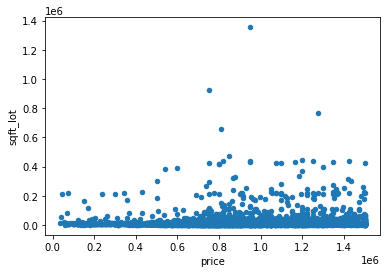

In [32]:
final_kc_df.plot(x='price', y='sqft_lot', kind='scatter');

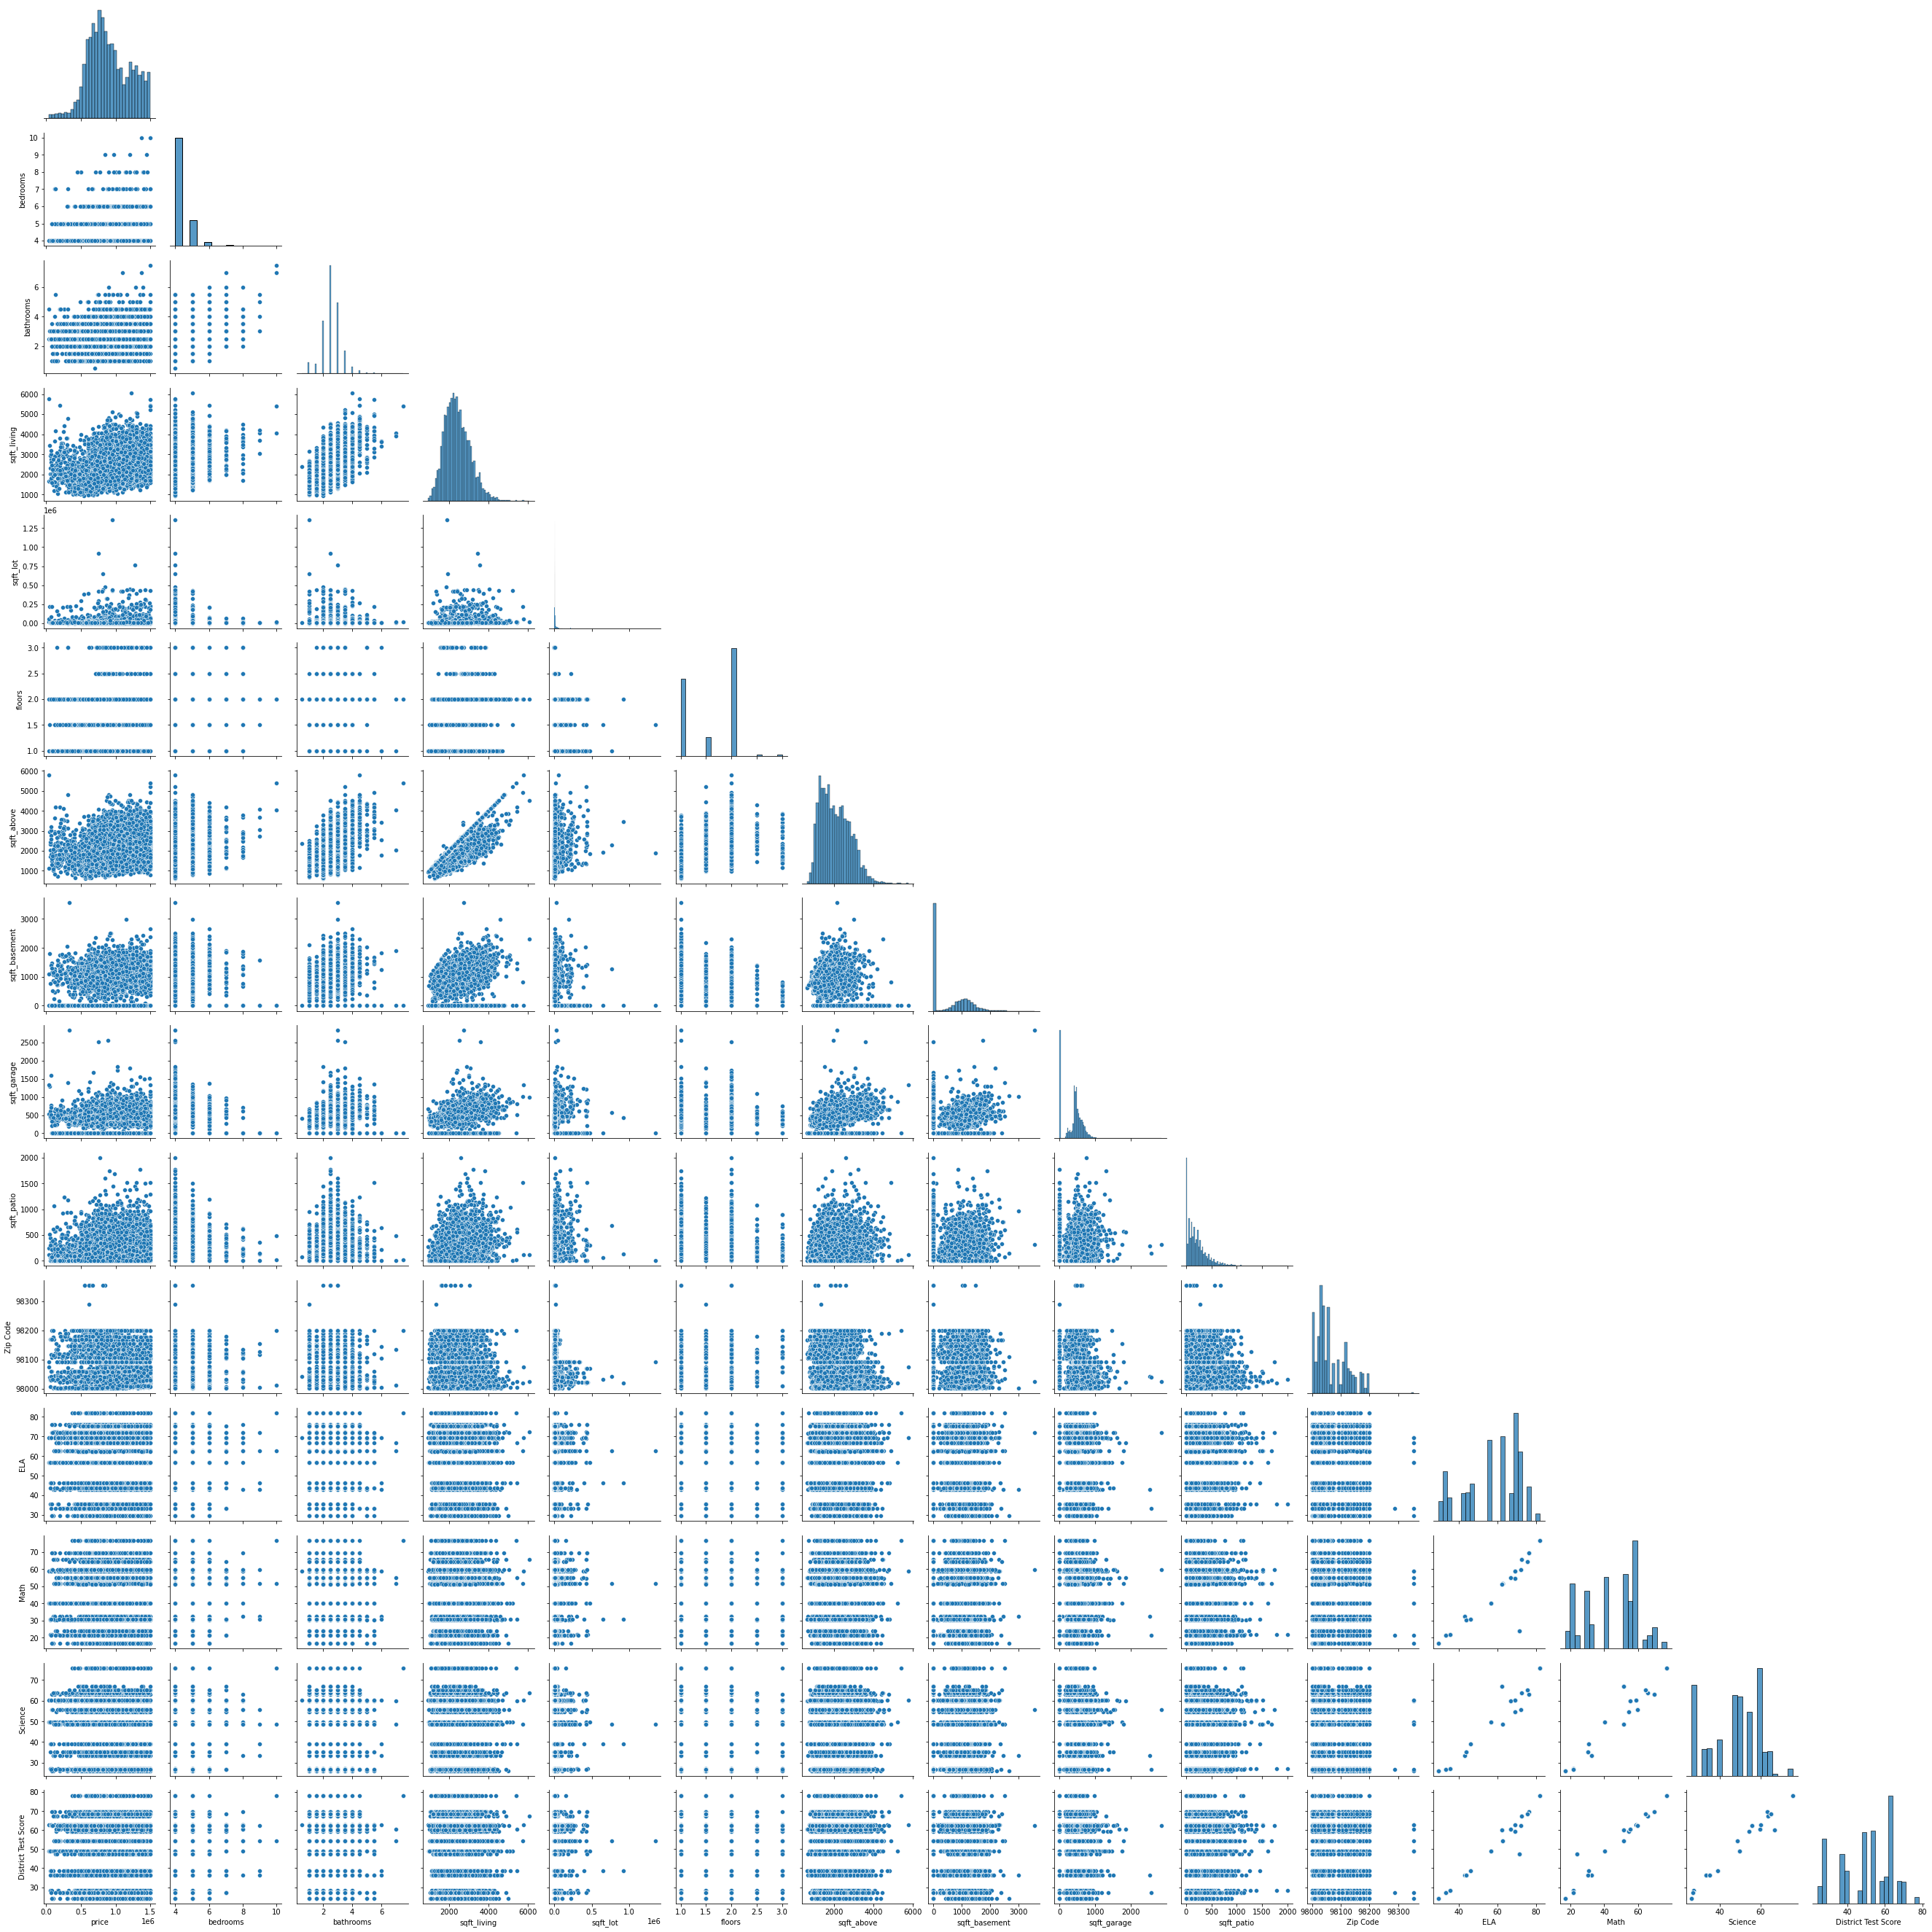

In [33]:
sns.pairplot(final_kc_df , corner = True)

<AxesSubplot:>

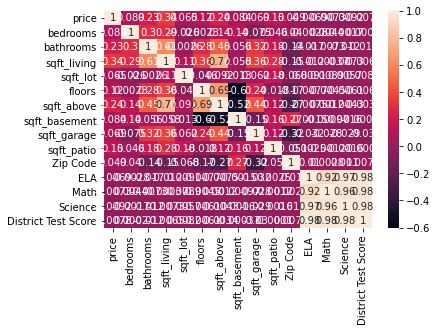

In [34]:
sns.heatmap(final_kc_df.corr(), annot = True)

### Dropping sqft_above as it is too closely correlated to sqft_living

In [35]:
final_kc_df = final_kc_df.drop(['sqft_above'], axis = 1)

### Creating a smaller dataset to work with

### Baseline Model....s

In [37]:
# Using price and sq ft of the living space, as it was the closest correlated numerical value
y = final_kc_df['price']
X_baseline = final_kc_df[['sqft_living']]

In [38]:
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     972.3
Date:                Wed, 15 Feb 2023   Prob (F-statistic):          8.84e-201
Time:                        12:12:03   Log-Likelihood:            -1.0436e+05
No. Observations:                7473   AIC:                         2.087e+05
Df Residuals:                    7471   BIC:                         2.087e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.242e+05   1.26e+04     41.662      

In [39]:
# Transformed DistrictName to a numerical data so that we could comoare the correlation to price
y = final_kc_df['price']
X = pd.get_dummies(final_kc_df['DistrictName'], drop_first = True)

In [40]:
baseline_model2 = sm.OLS(y, sm.add_constant(X))
baseline_results2 = baseline_model2.fit()

print(baseline_results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8180
Date:                Wed, 15 Feb 2023   Prob (F-statistic):              0.674
Time:                        12:12:03   Log-Likelihood:            -1.0481e+05
No. Observations:                7473   AIC:                         2.097e+05
Df Residuals:                    7455   BIC:                         2.098e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [41]:
# That didn't go well, so now we're going to try condition
y = final_kc_df['price']
X_cond = pd.get_dummies(final_kc_df['condition'], drop_first = True)

In [42]:
baseline_model3 = sm.OLS(y, sm.add_constant(X_cond))
baseline_results3 = baseline_model3.fit()

print(baseline_results3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     6.245
Date:                Wed, 15 Feb 2023   Prob (F-statistic):            0.00195
Time:                        12:12:03   Log-Likelihood:            -1.0481e+05
No. Observations:                7473   AIC:                         2.096e+05
Df Residuals:                    7470   BIC:                         2.097e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.018e+05   4369.071    206.409      0.0

In [43]:
y = final_kc_df['price']
X_baseline2 = final_kc_df[['sqft_living', 'bathrooms']]

In [44]:
baseline_model4 = sm.OLS(y, sm.add_constant(X_baseline2))
baseline_results4 = baseline_model4.fit()

print(baseline_results4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     490.1
Date:                Wed, 15 Feb 2023   Prob (F-statistic):          1.05e-200
Time:                        12:12:03   Log-Likelihood:            -1.0436e+05
No. Observations:                7473   AIC:                         2.087e+05
Df Residuals:                    7470   BIC:                         2.087e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.066e+05   1.42e+04     35.617      

In [45]:
final_kc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7473 entries, 0 to 7472
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                7473 non-null   float64
 1   bedrooms             7473 non-null   float64
 2   bathrooms            7473 non-null   float64
 3   sqft_living          7473 non-null   float64
 4   sqft_lot             7473 non-null   float64
 5   floors               7473 non-null   float64
 6   condition            7473 non-null   object 
 7   grade                7473 non-null   object 
 8   heat_source          7473 non-null   object 
 9   sewer_system         7473 non-null   object 
 10  sqft_basement        7473 non-null   float64
 11  sqft_garage          7473 non-null   float64
 12  sqft_patio           7473 non-null   float64
 13  Zip Code             7473 non-null   int64  
 14  DistrictName         7473 non-null   object 
 15  ELA                  7473 non-null   f

In [47]:
#onehot_enc = OneHotEncoder(drop = 'first', sparse = False)

#nominal_cols = ['Zip Code', 'DistrictName']
#onehot_enc.fit_transform(X_train[nominal_cols])

#X_train_nom_trans = onehot_enc.fit_transform(X_train[nominal_cols])
#X_train_nom_trans.shape

#cols = onehot_enc.get_feature_names()

#X_train_nom = pd.DataFrame(X_train_nom_trans, columns = cols)
#X_train_nom.head()

#X_process_train = pd.concat([X_train_numeric, X_train_cat],axis = 1)

### EDA - visualizations, mapping out distributions of individual variable, VIF, correlations

In [48]:
X = final_kc_df('price', axis = 1)
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values('VIF Factor', ascending=False)

TypeError: 'DataFrame' object is not callable

### Modeling
Prepare Data

In [49]:
from sklearn.linear_model import LinearRegression

# Prepare data
X = final_kc_df.drop('price', axis=1)
y = final_kc_df['price']

### TRAIN/TEST SPLIT

In [50]:
#X = final_kc_df.drop(columns='price')
#y = final_kc_df['price']
#X_train, X_test, y_train, y_test = train_test_split(
 #   X, y, test_size=0.3, random_state=42)

In [51]:
from sklearn.model_selection import train_test_split

# Test/Train Split - Train 70% of Data, Test 30% of Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Processing Data
Y target variable

In [52]:
#Train Data
y_train.shape

(5231,)

In [53]:
#Test Data
y_test.shape

(2242,)

In [54]:
#  0   price                7473 non-null   float64
#  1   bedrooms             7473 non-null   float64
#  2   bathrooms            7473 non-null   float64
#  3   sqft_living          7473 non-null   float64
#  4   sqft_lot             7473 non-null   float64
#  5   floors               7473 non-null   float64
#  6   condition            7473 non-null   object 
#  7   grade                7473 non-null   object 
#  8   heat_source          7473 non-null   object 
#  9   sewer_system         7473 non-null   object 
#  10  sqft_basement        7473 non-null   float64
#  11  sqft_garage          7473 non-null   float64
#  12  sqft_patio           7473 non-null   float64
#  13  Zip Code             7473 non-null   int64  
#  14  DistrictName         7473 non-null   object 
#  15  ELA                  7473 non-null   float64
#  16  Math                 7473 non-null   float64
#  17  Science              7287 non-null   float64
#  18  District Test Score  7473 non-null   float64

SyntaxError: invalid syntax (<ipython-input-54-7fb841073233>, line 1)

### Separate Continuos X Predictive Variables

In [55]:
X_train_numeric = X_train[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_basement',\
                           'sqft_garage','sqft_patio','ELA','Math','Science','District Test Score']]


In [56]:
#View Correlation between Independent Numeric Variables
X_train_numeric.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,sqft_garage,sqft_patio,ELA,Math,Science,District Test Score
bedrooms,1.000000,0.287568,0.288449,-0.029476,-0.000055,0.137390,-0.080808,0.029500,-0.010463,-0.000429,-0.008716,-0.006313
bathrooms,0.287568,1.000000,0.609371,0.002315,0.283804,0.041144,0.326079,0.178441,-0.004357,0.005349,0.002881,0.001425
sqft_living,0.288449,0.609371,1.000000,0.127341,0.348292,0.054827,0.370238,0.268682,-0.013484,-0.002513,-0.007080,-0.007622
sqft_lot,-0.029476,0.002315,0.127341,1.000000,-0.049423,0.020194,0.073059,0.218525,-0.002970,-0.006145,-0.007954,-0.005703
floors,-0.000055,0.283804,0.348292,-0.049423,1.000000,-0.608635,0.244579,-0.012494,-0.003097,-0.005239,-0.001257,-0.003437
sqft_basement,0.137390,0.041144,0.054827,0.020194,-0.608635,1.000000,-0.154209,0.168748,-0.006459,-0.004693,-0.007062,-0.006066
sqft_garage,-0.080808,0.326079,0.370238,0.073059,0.244579,-0.154209,1.000000,0.123184,-0.032425,-0.028494,-0.029366,-0.030602
sqft_patio,0.029500,0.178441,0.268682,0.218525,-0.012494,0.168748,0.123184,1.000000,-0.009540,-0.017039,-0.014877,-0.014150
ELA,-0.010463,-0.004357,-0.013484,-0.002970,-0.003097,-0.006459,-0.032425,-0.009540,1.000000,0.916840,0.972221,0.978306
Math,-0.000429,0.005349,-0.002513,-0.006145,-0.005239,-0.004693,-0.028494,-0.017039,0.916840,1.000000,0.958424,0.974276


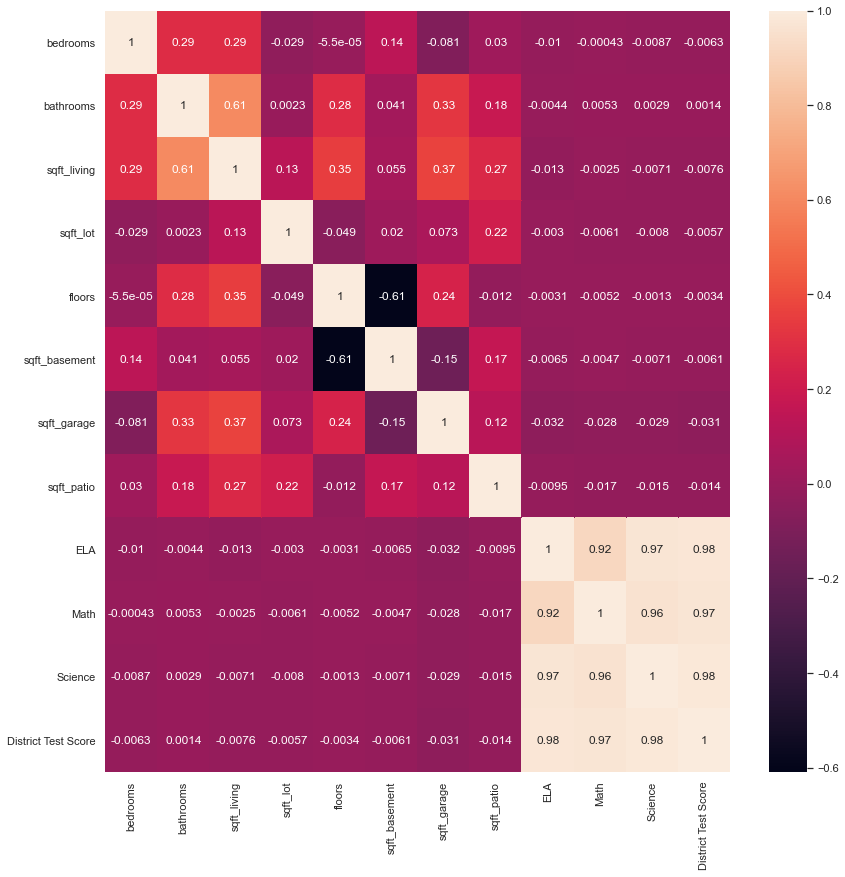

In [57]:
#Heatmap for Collinearity
sns.set(rc={'figure.figsize':(14, 14)})
sns.heatmap(X_train_numeric.corr(),annot=True);

### Discrete X Predictive Variables
### TRAIN
Process Ordinal, Fit and transform, get names out into df

In [58]:
from sklearn.preprocessing import OrdinalEncoder

In [59]:
ord_cat_selector = ['condition', 'grade']
X_train_ord_cat_subset = X_train[ord_cat_selector]
# X_train_ord_cat_subset #Uncomment to view

In [60]:
X_train_ord_cat_subset['condition'].unique()

array(['Average', 'Good', 'Very Good'], dtype=object)

In [61]:
X_train_ord_cat_subset['grade'].unique()

array(['8 Good', '7 Average', '9 Better', '6 Low Average', '10 Very Good',
       '11 Excellent', '5 Fair', '13 Mansion'], dtype=object)

In [62]:
#X_train_ord_cat_subset['heat_source'].unique()

In [63]:
#X_train_ord_cat_subset['sewer_system'].unique()

In [64]:
#X_train_ord_cat_subset['DistrictName'].unique()

In [65]:
# REPLACE WITH COLUMN'S UNIQUE VALUES IN ASCENDING ORDER --->
condition_list = ['Poor', 'Fair', 'Average', 'Good', 'Very Good'] 
grade_list = ['3 Poor', '5 Fair', '6 Low Average', '7 Average','8 Good','9 Better','10 Very Good','11 Excellent',\
             '12 Luxury','13 Mansion']

In [66]:
o_enc = OrdinalEncoder(categories = [condition_list, grade_list])
o_enc.fit(X_train_ord_cat_subset)

OrdinalEncoder(categories=[['Poor', 'Fair', 'Average', 'Good', 'Very Good'],
                           ['3 Poor', '5 Fair', '6 Low Average', '7 Average',
                            '8 Good', '9 Better', '10 Very Good',
                            '11 Excellent', '12 Luxury', '13 Mansion']])

In [67]:
o_enc.transform(X_train_ord_cat_subset)

array([[2., 4.],
       [2., 4.],
       [2., 4.],
       ...,
       [2., 3.],
       [2., 5.],
       [3., 3.]])

In [68]:
X_train_ord = pd.DataFrame(o_enc.transform(X_train_ord_cat_subset),
                        columns = X_train_ord_cat_subset.columns)

In [69]:
X_train_ord.head()

,condition,grade
0,2.0,4.0
1,2.0,4.0
2,2.0,4.0
3,3.0,3.0
4,4.0,3.0


### Discrete Nominal X Predictive Variables
### TRAIN
Process Nominal, Fit and transform, get names out into df

In [70]:
from sklearn.preprocessing import OneHotEncoder
onehot_enc = OneHotEncoder(drop = 'first', sparse = False)

In [71]:
nominal_cols = ['heat_source', 'sewer_system', 'Zip Code', 'DistrictName']
onehot_enc.fit_transform(X_train[nominal_cols])

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [72]:
X_train_nom_trans = onehot_enc.fit_transform(X_train[nominal_cols])
X_train_nom_trans.shape

(5231, 98)

In [73]:
cols = onehot_enc.get_feature_names()

In [74]:
X_train_nom = pd.DataFrame(X_train_nom_trans, columns = cols)
X_train_nom.head()

,x0_Electricity/Solar,x0_Gas,x0_Gas/Solar,x0_Oil,x0_Oil/Solar,x0_Other,x1_PUBLIC,x1_PUBLIC RESTRICTED,x2_98002,x2_98003,...,x3_Northshore School District,x3_Renton School District,x3_Riverview School District,x3_Seattle School District No. 1,x3_Shoreline School District,x3_Skykomish School District,x3_Snoqualmie Valley School District,x3_Tahoma School District,x3_Tukwila School District,x3_Vashon Island School District
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Combine Discrete/Categorical X/ Predictive Variables

In [75]:
#combine all catergorical variables

X_train_cat_df = pd.concat([X_train_ord,X_train_nom],axis = 1)
X_train_cat_df

,condition,grade,x0_Electricity/Solar,x0_Gas,x0_Gas/Solar,x0_Oil,x0_Oil/Solar,x0_Other,x1_PUBLIC,x1_PUBLIC RESTRICTED,...,x3_Northshore School District,x3_Renton School District,x3_Riverview School District,x3_Seattle School District No. 1,x3_Shoreline School District,x3_Skykomish School District,x3_Snoqualmie Valley School District,x3_Tahoma School District,x3_Tukwila School District,x3_Vashon Island School District
0,2.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,4.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5227,2.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5228,2.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5229,2.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Combine Continuous and Discrete X/ Predictive Variables

In [76]:
#Train Data - Combine all processed X Variables
X_process_train = pd.concat([X_train_numeric.reset_index(),X_train_cat_df],axis = 1)

In [77]:
X_process_train.head()

,index,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,sqft_garage,sqft_patio,ELA,...,x3_Northshore School District,x3_Renton School District,x3_Riverview School District,x3_Seattle School District No. 1,x3_Shoreline School District,x3_Skykomish School District,x3_Snoqualmie Valley School District,x3_Tahoma School District,x3_Tukwila School District,x3_Vashon Island School District
0,3459,4.0,3.5,3265.0,7138.0,2.0,0.0,560.0,30.0,43.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7093,4.0,2.5,2910.0,5062.0,2.0,0.0,520.0,440.0,72.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3783,4.0,2.5,2490.0,4016.0,2.0,0.0,360.0,270.0,66.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,292,4.0,2.0,1790.0,23086.0,1.0,0.0,0.0,670.0,42.9,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3288,4.0,3.0,1860.0,15133.0,1.0,1060.0,220.0,300.0,71.4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [78]:
X_process_train.shape

(5231, 113)

In [79]:
X_process_train.isnull().sum()

index                                   0
bedrooms                                0
bathrooms                               0
sqft_living                             0
sqft_lot                                0
                                       ..
x3_Skykomish School District            0
x3_Snoqualmie Valley School District    0
x3_Tahoma School District               0
x3_Tukwila School District              0
x3_Vashon Island School District        0
Length: 113, dtype: int64

### TRAIN 
Process Continuous (what are you imputing missing info w/?)

#### Scale the Data

In [80]:
# Let's create (instantiate) a StandardScaler object to scale our data for us.
from sklearn.preprocessing import StandardScaler

In [81]:
# Now we'll apply it to our data by using the .fit() (calculates stds and means) and .transform() methods.
ss = StandardScaler()
#Train Data
ss.fit(X_process_train)
X_standard_process_train = ss.transform(X_process_train)

#Test Data
#X_standard_process_test = ss.transform(X_process_test)

In [82]:
pd.DataFrame(X_standard_process_train, columns = X_process_train.columns).isna().sum()

index                                   0
bedrooms                                0
bathrooms                               0
sqft_living                             0
sqft_lot                                0
                                       ..
x3_Skykomish School District            0
x3_Snoqualmie Valley School District    0
x3_Tahoma School District               0
x3_Tukwila School District              0
x3_Vashon Island School District        0
Length: 113, dtype: int64

#### Creating, Fitting, and Running the Model

In [83]:
# Instantiate model
lr_simple_model = LinearRegression()

# Fit model
result = lr_simple_model.fit(X_standard_process_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# Retrieve estimated slope coefficient
result.coef_

In [ ]:
# Retrieve estimated y-intercept coefficient
result.intercept_

In [ ]:
#GIVES US OUR R**2
lr.score(X_standard_process_train, y_train)

In [ ]:
#These are our predictions - USE TEST DATA
y_hat = lr.predict(X_standard_process_test)
y_hat

#### Evaluate Final Model Performance
Observing Residuals

In [ ]:
y_hat = lr.predict(X_standard_process_test)
resid = (y_train - y_hat)

fig, ax = plt.subplots()
ax.scatter(x=range(y_hat.shape[0]),y=resid, alpha=0.1);

#### Linear Regression Fit

#### Check Assumptions! Match what you thought w/ EDA?

### TEST 
(Do same you did to train, EXCEPT JUST transform, no fitting)

    ### Toying with another csv we made...

In [ ]:
final_house_df = pd.read_csv('/Users/aheinke/Documents/Flatiron/NYC-DS-010923/Phase_2/Phase2_Final_Proj/house_kc.csv')
final_house_df

In [ ]:
final_house_df.info()

In [ ]:
final_house_df.describe()